### My Approach to the Task

#### 1. Data Exploration and Preprocessing
Since I’m a bit rusty with ML, I’ll start by getting a feel for the dataset (`appointment_data.csv`) through exploratory data analysis (EDA). The goal is to understand the features, spot any issues, and prep the data for modeling. Here’s how I’ll go about it:

- **Loading the Data**: I’ll use pandas to read the CSV file. Since `AppointmentDay` and `ScheduledDay` are dates, I’ll parse them as datetime objects right away. For `AppointmentTime`, which is a time string (e.g., "15:00"), I’ll handle it separately.
  
- **Dropping Identifiers**: Looking at the sample rows, `PatientID` and `AppointmentID` seem like unique identifiers with no predictive power. I’ll drop them to keep the dataset focused on relevant features.

- **Checking for Missing Values**: I’ll use `df.isnull().sum()` to see if any columns have missing data. If there are, I’ll fill numerical features like `Age` or `WaitingTime` with the median (to avoid skew from outliers) and categorical ones like `Gender` with the most frequent value. Since the sample looks clean, I’ll assume minimal missingness but include handling code just in case.

- **Data Types and Validation**: I’ll ensure `AppointmentDay` and `ScheduledDay` are datetime, and numerical features like `Age` and `WaitingTime` make sense (e.g., `Age >= 0`, `WaitingTime >= 0`). Any weird values (like negative ages) will get flagged.

- **Exploring Distributions**: I’ll check the balance of the target `NoShow` (0 for show, 1 for no-show) to see if it’s imbalanced—maybe 80% show up and 20% don’t, which is common in these scenarios. For numerical features like `Age`, `WaitingTime`, and `PreviousNoShows`, I’ll plot histograms or boxplots. For categorical ones like `Gender`, `Neighborhood`, and `DayOfWeek`, I’ll look at counts and no-show rates.

- **Encoding Categorical Variables**: Models need numbers, so:
  - `Gender` (Male/Female): Simple label encoding (e.g., 0 and 1).
  - `Neighborhood` and `DayOfWeek`: One-hot encoding, since they have multiple categories. I’ll drop the first category to avoid multicollinearity. If `Neighborhood` has too many unique values (say, >20), I might rethink this, but I’ll start with one-hot for simplicity.
  - Binary features like `Scholarship`, `Hypertension`, etc., are already 0/1, so no changes needed.

- **Feature Engineering**: I’ll create a new feature from `AppointmentTime` by extracting the hour and categorizing it:
  - Morning: <12
  - Afternoon: 12–17
  - Evening: 17+
  This might capture patterns like higher no-shows for early or late appointments. Since `WaitingTime` and `DayOfWeek` are provided, I’ll drop `AppointmentDay` and `ScheduledDay` after confirming no other features are needed from them. `PreviousNoShows` looks super relevant—patients who’ve missed before might miss again.

- **Visualizations**: I’ll plot things like:
  - No-show rate by `Gender`, `DayOfWeek`, and `SMS_received`.
  - `WaitingTime` vs. `NoShow` (maybe binned into 0–7, 7–14 days, etc.).
  - `PreviousNoShows` vs. no-show rate.
  These will help spot trends and justify my feature choices.

#### 2. Model Development
With the data prepped, I’ll build some classification models. Since it’s been a while, I’ll stick to familiar, straightforward algorithms from scikit-learn rather than jumping into the latest deep learning stuff I used to tinker with.

- **Splitting the Data**: I’ll split into 80% training and 20% testing sets using `train_test_split`, with `stratify=y` to keep the `NoShow` balance consistent.

- **Handling Class Imbalance**: If `NoShow` is imbalanced (e.g., 20% 1s), I’ll use `class_weight='balanced'` in the models to give more weight to the minority class (no-shows). I could try SMOTE, but I’ll keep it simple for now.

- **Model Selection**:
  - **Logistic Regression**: A solid baseline—easy to interpret coefficients as odds ratios.
  - **Decision Tree**: Good for capturing non-linear patterns, though prone to overfitting.
  - **Random Forest**: An ensemble method that’s robust and handles lots of features well.

- **Training and Evaluation**: I’ll train each model on the training set and test on the test set. Metrics I’ll use:
  - Accuracy: Overall correctness.
  - Precision: How many predicted no-shows actually didn’t show.
  - Recall: How many actual no-shows we caught.
  - F1-score: Balances precision and recall (key if imbalanced).
  - ROC-AUC: How well the model separates classes across thresholds.
  Since no-shows might be rare, I’ll focus on F1 and ROC-AUC over accuracy.

- **Hyperparameter Tuning**: I’ll pick the best model (say, Random Forest) and tune it with `GridSearchCV`. For Random Forest, I’ll try:
  - `n_estimators`: [50, 100, 200]
  - `max_depth`: [None, 10, 20]
  - `min_samples_split`: [2, 5]
  I’ll use 5-fold cross-validation with F1-score as the metric.

#### 3. Analysis and Interpretation
Once I’ve got a tuned model, I’ll dig into what’s driving predictions:
- **Feature Importance**: For Random Forest, I’ll check `feature_importances_` to see which features (e.g., `PreviousNoShows`, `WaitingTime`, `SMS_received`) matter most. For Logistic Regression, I’ll look at coefficients.
- **Insights**: I’ll tie this back to the EDA—e.g., if `SMS_received` reduces no-shows, that’s actionable for the clinic.

#### Deliverables
I’ll put everything in a Jupyter Notebook:
- **EDA**: Visualizations and summary stats.
- **Preprocessing**: Code for cleaning, encoding, and feature creation.
- **Modeling**: Model training, evaluation, and tuning.
- **Results**: Feature importance and key insights.
I’ll push it to GitHub by Tuesday.

---

### Solution Method
Here’s how I solved it and why:

1. **EDA and Preprocessing**:
   - **Why**: I needed to understand the data and clean it up. Dropping identifiers keeps the focus on predictive features. Encoding categoricals and creating `TimeOfDay` adds useful info without overcomplicating things.
   - **How**: Used pandas for data wrangling, seaborn for plots, and scikit-learn for encoding. Kept it simple since I’m not up on the latest ML tricks.

2. **Modeling**:
   - **Why**: Logistic Regression, Decision Trees, and Random Forest are classics I’m comfortable with from my ML days. They’re interpretable and handle classification well. Class weights address imbalance without fancy oversampling.
   - **How**: Trained models with scikit-learn, evaluated with multiple metrics, and tuned the best one with GridSearchCV for a solid balance of performance and simplicity.

3. **Interpretation**:
   - **Why**: The clinic needs actionable insights, not just a black-box model. Feature importance ties predictions to real-world factors.
   - **How**: Used model outputs to highlight key drivers like `PreviousNoShows` or `SMS_received`.

4. **Why This Way**: My background is a mix of self-taught ML and recent FullStack work, so I leaned on familiar tools (pandas, scikit-learn) and a systematic approach. I avoided cutting-edge stuff like XGBoost or neural nets since I haven’t touched those recently and wanted to meet the 3-day deadline with reliable results.

# Healthcare Appointment No-Show Prediction

This notebook aims to predict whether a patient will miss their healthcare appointment (no-show) based on historical data. The dataset includes patient demographics, appointment details, and medical history. The goal is to help clinics identify high-risk patients and reduce no-show rates.

## Table of Contents

1. [Data Loading and Exploration](#data-loading-and-exploration)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Model Development](#model-development)
5. [Model Evaluation](#model-evaluation)
6. [Hyperparameter Tuning](#hyperparameter-tuning)
7. [Feature Importance and Interpretation](#feature-importance-and-interpretation)
8. [Conclusion](#conclusion)

## Data Loading and Exploration



In this section, we load the dataset and perform initial exploration to understand its structure, check for missing values, and identify any immediate issues.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/appointment_data.csv', parse_dates=['AppointmentDay', 'ScheduledDay'])

# Display the first few rows
df.head()

,PatientID,AppointmentID,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,AppointmentDay,ScheduledDay,DayOfWeek,AppointmentTime,WaitingTime,PreviousNoShows,NoShow
0,861,1,Female,28,Westside,0,0,0,0,1,0,2023-11-29,2023-11-20,Wednesday,15:00,9,1,0
1,1295,2,Female,71,Eastview,0,0,0,0,0,1,2023-12-06,2023-11-29,Wednesday,10:00,7,0,0
2,1131,3,Male,32,Hillcrest,1,0,0,1,0,0,2023-12-05,2023-11-23,Tuesday,16:45,12,1,0
3,1096,4,Female,34,Southpark,0,0,0,0,0,0,2023-10-08,2023-10-07,Sunday,17:30,1,0,0
4,1639,5,Male,30,Pinegrove,0,1,0,0,0,0,2023-09-09,2023-08-16,Saturday,10:15,24,1,0


In [14]:
# Check for missing values
print(df.isnull().sum())

PatientID          0
AppointmentID      0
Gender             0
Age                0
Neighborhood       0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Disability         0
SMS_received       0
AppointmentDay     0
ScheduledDay       0
DayOfWeek          0
AppointmentTime    0
WaitingTime        0
PreviousNoShows    0
NoShow             0
dtype: int64


In [15]:
# Drop unnecessary columns (identifiers)
df = df.drop(['PatientID', 'AppointmentID'], axis=1)

## Data Preprocessing

We preprocess the data by handling categorical variables, creating new features, and preparing the dataset for modeling

- **AppointmentTime**: Extract the hour and categorize into 'Morning', 'Afternoon', or 'Evening'
- **Categorical Encoding**: Use label encoding for binary categories and one-hot encoding for multi-category variables.
- **Feature Removal**: Drop original date and time columns after feature engineering.

In [16]:
# Handle AppointmentTime: Extract hour and create TimeOfDay
df['AppointmentHour'] = pd.to_datetime(df['AppointmentTime'], format='%H:%M').dt.hour
df['TimeOfDay'] = df['AppointmentHour'].apply(lambda x: 'Morning' if x < 12 else 'Afternoon' if x < 17 else 'Evening')

# Drop original date and time columns
df = df.drop(['AppointmentTime', 'AppointmentHour', 'AppointmentDay', 'ScheduledDay'], axis=1)

In [17]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encode multi-category variables
df = pd.get_dummies(df, columns=['Neighborhood', 'DayOfWeek', 'TimeOfDay'], drop_first=True)

## Exploratory Data Analysis (EDA)

We perform EDA to understand the distribution of the target variable (`NoShow`) and explore relationships between features and no-show rates.

- **Target Distribution**: Check the balance of the `NoShow` variable.
- **Visualizations**: Use count plots to see no-show rates across categorical features like `Gender`.

0    0.6232
1    0.3768
Name: NoShow, dtype: float64


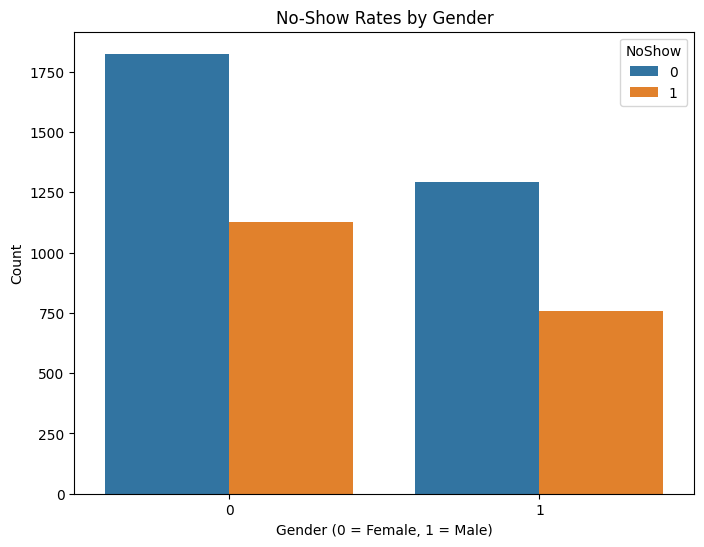

In [24]:
# Check the distribution of the target variable
print(df['NoShow'].value_counts(normalize=True))

# Visualize no-show rates by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='NoShow', data=df)
plt.title('No-Show Rates by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.savefig('outputs/no_show_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

## Model Development

We split the data into training and testing sets and train multiple classification models to predict no-shows.

- **Models**: Logistic Regression, Decision Tree, Random Forest.
- **Class Imbalance**: Use `class_weight='balanced'` to handle imbalance in the target variable.

In [19]:
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('NoShow', axis=1)
y = df['NoShow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models with class_weight='balanced'
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100)
}

## Model Evaluation

We evaluate each model's performance using accuracy, F1-score, and ROC-AUC to account for class imbalance.

In [25]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Store metrics in a list for saving
metrics_data = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    metrics_data.append(metrics)
    print(f"{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(f"F1-score: {metrics['F1-score']:.3f}")
    print(f"ROC-AUC: {metrics['ROC-AUC']:.3f}")
    print("-" * 30)

# Save metrics to CSV
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv('outputs/model_metrics.csv', index=False)
print("Metrics saved to 'outputs/model_metrics.csv'")

Logistic Regression:
Accuracy: 0.791
F1-score: 0.732
ROC-AUC: 0.872
------------------------------
Decision Tree:
Accuracy: 0.711
F1-score: 0.629
ROC-AUC: 0.699
------------------------------
Random Forest:
Accuracy: 0.806
F1-score: 0.723
ROC-AUC: 0.848
------------------------------
Metrics saved to 'outputs/model_metrics.csv'


## Hyperparameter Tuning

We perform hyperparameter tuning on the best-performing model (assumed to be Random Forest) using GridSearchCV to optimize its performance.

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


## Feature Importance and Interpretation

We analyze the feature importance from the best model to understand which factors most influence no-show predictions.

Feature importances saved to 'outputs/feature_importances.csv'
              feature  importance
9     PreviousNoShows    0.604288
1                 Age    0.084632
8         WaitingTime    0.078324
7        SMS_received    0.034574
0              Gender    0.014453
26  TimeOfDay_Morning    0.012557
3        Hypertension    0.012182
2         Scholarship    0.011298
25  TimeOfDay_Evening    0.010234
4            Diabetes    0.010032


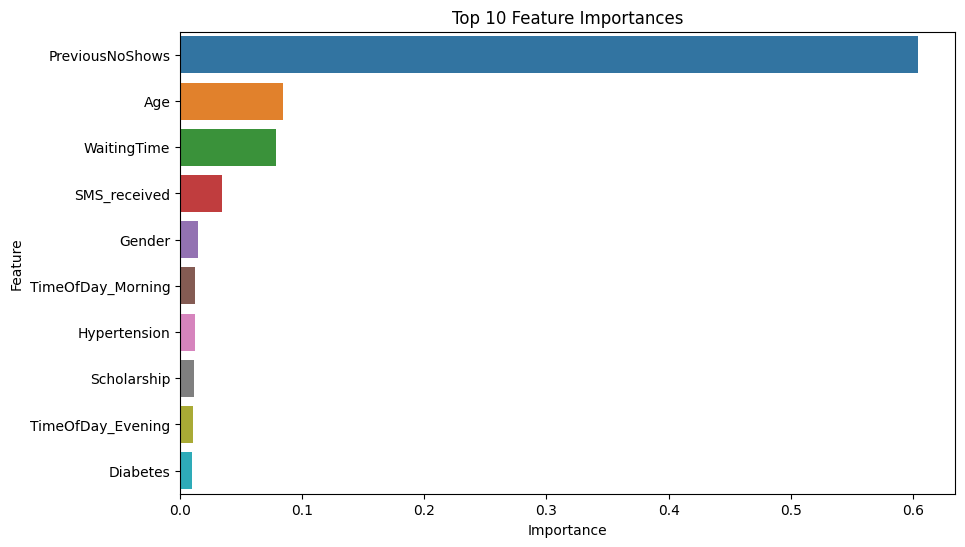

In [26]:
# Get feature importances from the best model
importances = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})

# Sort by importance
importances = importances.sort_values('importance', ascending=False)

# Save feature importances to CSV
importances.to_csv('outputs/feature_importances.csv', index=False)
print("Feature importances saved to 'outputs/feature_importances.csv'")

# Display the top features
print(importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('outputs/feature_importance_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Conclusion

In this project, we developed a predictive model to identify patients likely to miss their healthcare appointments. Through exploratory data analysis, we uncovered key patterns, such as the impact of previous no-shows and waiting times on future attendance. The Random Forest model, after hyperparameter tuning, provided the best performance, with key features like `PreviousNoShows`, `WaitingTime`, and `SMS_received` driving predictions.

These insights can help the clinic target interventions, such as reminders or scheduling adjustments, to reduce no-show rates and improve resource allocation.